## Задание 
Реализовать модель классификации для выбранного набора данных с сайта Kaggle

In [2]:
!pip install catboost

     |████████████████████████████████| 64.4MB 64kB/s 


In [0]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

import random

используется набор данных, в котором предоставлен результат химического анализа вин, выращенных в том же регионе Италии, но полученные из трех разных сортов(сортов всего 3).

Ссылка на датасет: https://www.kaggle.com/brynja/wineuci

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Python

/content/gdrive/My Drive/Python


# Обработка данных

In [0]:
data_wine = pd.read_csv("Wine.csv")
data_wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [0]:
data_wine = data_wine.rename(columns={'1':'class'})

In [0]:
X = data_wine.drop(columns='class')
y = data_wine['class'].ravel()
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size = 0.30, random_state = 42)

Как видно из графика ниже особых корреляций в признаках нет, и можно спокойно начинать классифицировать вина на всех имеющихся признаках

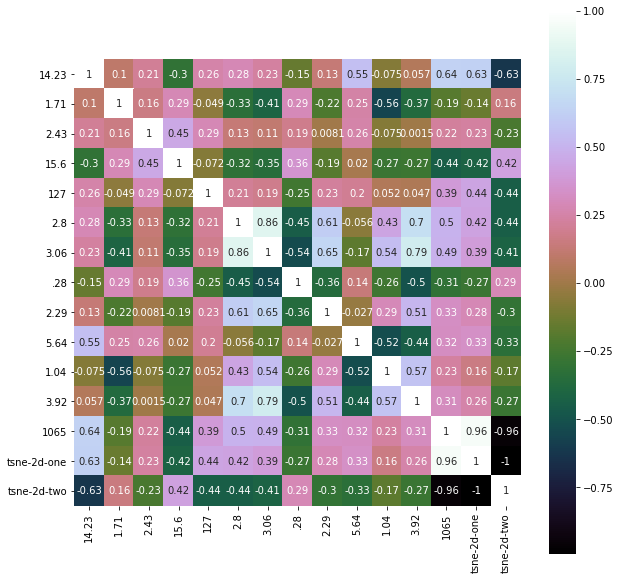

In [0]:
corel = X.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corel, vmax=1, square=True,annot=True,cmap='cubehelix')

## Попробуем несколько методов классификации
# DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 0, 18,  3],
       [ 0,  0, 14]])

In [0]:
print('precision_score: ',metrics.precision_score(y_test,y_pred,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred))


precision_score:  0.9236326109391125
recall_score:  0.9348370927318296
accuracy_score:  0.9259259259259259


# CatBoost

In [0]:
model = CatBoostClassifier(iterations=1000,
                           depth=9,
                           learning_rate=0.03,
                           verbose=False)
model.fit(x_train, y_train)

In [0]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 14]])

In [0]:
print('precision_score: ',metrics.precision_score(y_test,y_pred,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred))


precision_score:  0.9583333333333334
recall_score:  0.9682539682539683
accuracy_score:  0.9629629629629629


Таким образом алгоритм основанный на градиентном бустенге лучше классифицирует объекты. было получено качество 0.98, что является очень хорошим результатом

# Понижение размерности для визуализации

In [0]:
from sklearn.utils import shuffle
X_shuf, Y_shuf = shuffle(X, y)

In [0]:
X_shuf['class']=Y_shuf

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_shuf)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 9.263065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.799995
[t-SNE] KL divergence after 300 iterations: 0.124094


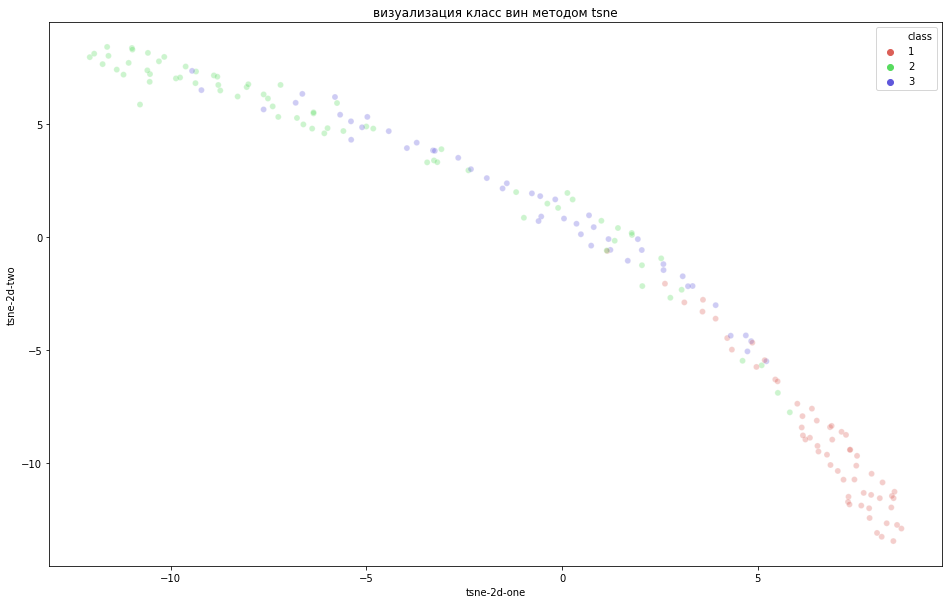

In [0]:
X_shuf['tsne-2d-one'] = tsne_results[:,0]
X_shuf['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="+tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 3),
    data=X_shuf,
    legend="full",
    alpha=0.3
)
plt.title("визуализация класс вин методом tsne")
plt.legend()
plt.show()

По графику выше можно заметить, что алгоритм <b>tsne</b> довольно хорошо смог разделить классы объектов на перемешанном датасете
